# 휴대폰 브랜드 이탈 고객 조사 - 머신러닝 훈련

In [21]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [22]:
# 폰트 한글화 세팅

# # window font setting
# font_path = 'C:/Windows/Fonts/batang.ttc'           # 한글 폰트를 적용하여 시각화

# # PJE font setting
# plt.rcParams['font.family'] = 'Malgun Gothic' 

# mac font setting
#font_path = '/Library/Fonts/Arial Unicode.ttf'
#font = fm.FontProperties(fname=font_path).get_name()
#matplotlib.rc('font', family=font)

### 컬럼명 정리 (21, 22, 23)

| 원본 컬럼명                     | 정리된 컬럼명        |
|---------------------------------|-------------------|
| 고객 고유 번호                | pid                 |
| 스마트폰 제조사                | brand               |
| 이메일                          | email               |
| 메신저                          | messenger           |
| 블로그                          | blog                |
| 클라우드                        | cloud               |
| 온라인 음성통화 여부               | call_check          |
| 년간 서비스 구매 이용 채널          | service_purchase    |
| 모바일 간편 송금                  | money_transfer      |
| 신용카드 저장 (모바일에 신용카드 저장) | credit_card       |
| 통신사 가격                      | agency_purchase     |
| 기기 가격                       | machine_purchase    |
| 가격 부담(부모 or 자신)           | phone_owner         |
| 스마트폰 구분 (데이터 구별)      | data                |
| 스마트폰 DMB 기능             | dmb                 |
| 스마트폰 통신사                | agency              |
| 음성 무제한 서비스 유무        | voice_service       |
| 데이터 무제한 서비스 유무      | data_service        |
| 스마트폰 사용 기간             | use_date            |
| 나이                        | age                 |
| 최종 학력 (학교별로 0~6)        | school              |
| 혼인 유무 (1~4)              | marry               |
| 월평균 소득 (평균 소득 1~18)    | salary              |
| 직업 유무 (직업 유무)          | job                 |
| 종교 유무 (종교 유무)          | religion            |

C:\Users\Playdata\AppData\Local\Temp\ipykernel_17236\912124021.py:34: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Playdata\AppData\Local\Temp\ipykernel_17236\912124021.py:34: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Playdata\AppData\Local\Temp\ipykernel_17236\912124021.py:34: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Playdata\AppData\Local\Temp\ipykernel_17236\912124021.py:34: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Playdata\AppData\Local\Temp\ipykernel_17236\912124021.py:34: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Playdata\AppData\Local\Temp\ipykernel_17236\912124021.py:34: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) m

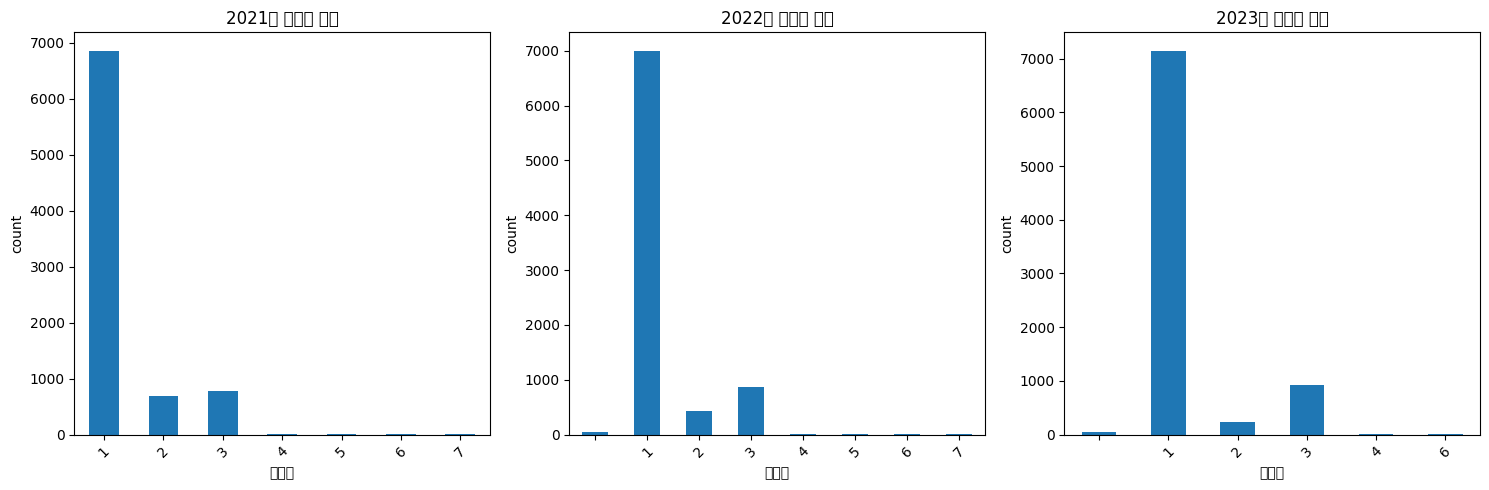

In [23]:
# 시각화 자료로 년도별 제조사 확인

# CSV 파일 읽기
phone_df = pd.read_csv('./data/phone_information.csv', low_memory=False)


# 서브플롯 생성
plt.figure(figsize=(15, 5))

# 2021년 데이터
plt.subplot(1, 3, 1)
phone_df['brand_21'].value_counts().sort_index().plot(kind='bar')
plt.title('2021년 제조사 분포')
plt.xlabel('제조사')
plt.ylabel('count')
plt.xticks(rotation=45)

# 2022년 데이터
plt.subplot(1, 3, 2)
phone_df['brand_22'].value_counts().sort_index().plot(kind='bar')
plt.title('2022년 제조사 분포')
plt.xlabel('제조사')
plt.ylabel('count')
plt.xticks(rotation=45)

# 2023년 데이터
plt.subplot(1, 3, 3)
phone_df['brand_23'].value_counts().sort_index().plot(kind='bar')
plt.title('2023년 제조사 분포')
plt.xlabel('제조사')
plt.ylabel('count')
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

###  데이터 형변환

In [24]:
# # 데이터 값을 unique로 찍어본 결과 str로 들어가있는 데이터가 있어 int로 형변환 해주어야 함
# print(phone_df['brand_21'].unique())
# print(phone_df['brand_22'].unique())
# print(phone_df['brand_23'].unique())
# print(phone_df['money_transfer_21'].unique())

# object 타입인 컬럼들 찾기
object_columns = phone_df.select_dtypes(include=['object']).columns

# object 타입 컬럼들을 숫자형으로 변환
for col in object_columns:
    phone_df.loc[:, col] = pd.to_numeric(phone_df[col], errors='coerce').astype('Int64')

# 변환된 컬럼 수 확인
print(f"\n변환된 컬럼 수: {len(object_columns)}개")
print("변환된 컬럼:", list(object_columns))


변환된 컬럼 수: 31개
변환된 컬럼: ['service_purchase_21', 'money_transfer_21', 'cradit_card_21', 'call_check_22', 'service_purchase_22', 'money_transfer_22', 'cradit_card_22', 'agency_purchase_22', 'machine_purchase_22', 'phone_owner_22', 'data_22', 'dmb_22', 'agency_22', 'voice_service_22', 'data_service_22', 'use_date_22', 'brand_22', 'call_check_23', 'service_purchase_23', 'money_transfer_23', 'cradit_card_23', 'agency_purchase_23', 'machine_purchase_23', 'phone_owner_23', 'data_23', 'dmb_23', 'agency_23', 'voice_service_23', 'data_service_23', 'use_date_23', 'brand_23']


###  2021 -> 2022 (이탈자), 2022 -> 2023 (이탈자),  2021 -> 2022 -> 2023 (복귀자)

In [25]:
# 2022년도 이탈자

# 값 빼줌
changed_users22 = phone_df[
   (phone_df['brand_21'] == 1) & 
   (phone_df['brand_22'] != 1)
]

# 결과 확인
print("브랜드 변경 고객 수:", len(changed_users22))
print("\n변경된 사례:")
print(changed_users22[['pid', 'brand_21', 'brand_22']])

# 어떤 브랜드로 변경되었는지 분포 확인
brand_change_22 = changed_users22['brand_22'].value_counts()
print("\n변경된 브랜드 분포:")
print(brand_change_22)


브랜드 변경 고객 수: 575

변경된 사례:
            pid  brand_21 brand_22
1         10002         1        3
72       440001         1        2
75       440004         1        2
95       550002         1        3
105      600005         1        3
...         ...       ...      ...
8215  116530001         1        3
8216  116530002         1        3
8225  116720002         1        2
8226  116720003         1        3
8227  116720004         1        3

[575 rows x 3 columns]

변경된 브랜드 분포:
brand_22
3    318
2    217
6      2
4      1
Name: count, dtype: int64


In [26]:
# 2023년도 이탈자

changed_users23 = phone_df[
   (phone_df['brand_22'] == 1) & 
   (phone_df['brand_23'] != 1)
]

# 결과 확인
print("브랜드 변경 고객 수:", len(changed_users23))
print("\n변경된 사례:")
print(changed_users23[['pid', 'brand_22', 'brand_23']])

# 어떤 브랜드로 변경되었는지 분포 확인
brand_change_23 = changed_users23['brand_23'].value_counts()
print("\n변경된 브랜드 분포:")
print(brand_change_23)



브랜드 변경 고객 수: 474

변경된 사례:
            pid brand_22 brand_23
19       100002        1        3
23       160001        1        2
39       300003        1        3
40       300004        1        3
43       310003        1        3
...         ...      ...      ...
8152  115890003        1        3
8156  115910004        1        3
8238  116990001        1        2
8242  117020001        1        2
8265  117300001        1        2

[474 rows x 3 columns]

변경된 브랜드 분포:
brand_23
3    343
2    111
4      4
6      3
Name: count, dtype: int64


In [27]:
# 2023년도 복귀자       ->     복귀자는 다시 생각해보겠지만 일단 이탈자만 생각하기로 함

returned_users = phone_df[
    (phone_df['brand_21'] == 1) &
   (phone_df['brand_22'] != 1) & 
   (phone_df['brand_23'] == 1)
]

# 결과 확인
print("브랜드 변경 고객 수:", len(returned_users))
print("\n변경된 사례:")
print(returned_users[['pid', 'brand_21', 'brand_22', 'brand_23']])

# 어떤 브랜드로 변경되었는지 분포 확인
brand_return_23 = returned_users['brand_23'].value_counts()
print("\n변경된 브랜드 분포:")
print(brand_return_23)

브랜드 변경 고객 수: 357

변경된 사례:
            pid  brand_21 brand_22 brand_23
1         10002         1        3        1
72       440001         1        2        1
75       440004         1        2        1
105      600005         1        3        1
107      620001         1        3        1
...         ...       ...      ...      ...
8098  115420002         1        2        1
8153  115910001         1        2        1
8215  116530001         1        3        1
8216  116530002         1        3        1
8225  116720002         1        2        1

[357 rows x 4 columns]

변경된 브랜드 분포:
brand_23
1    357
Name: count, dtype: int64


C:\Users\Playdata\AppData\Local\Temp\ipykernel_17236\628813523.py:30: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Playdata\AppData\Local\Temp\ipykernel_17236\628813523.py:30: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Playdata\AppData\Local\Temp\ipykernel_17236\628813523.py:30: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Playdata\AppData\Local\Temp\ipykernel_17236\628813523.py:30: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Playdata\AppData\Local\Temp\ipykernel_17236\628813523.py:30: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Playdata\AppData\Local\Temp\ipykernel_17236\628813523.py:30: UserWarning: Glyph 53448 (\N{HANGUL SYLLABLE TAL}) mi

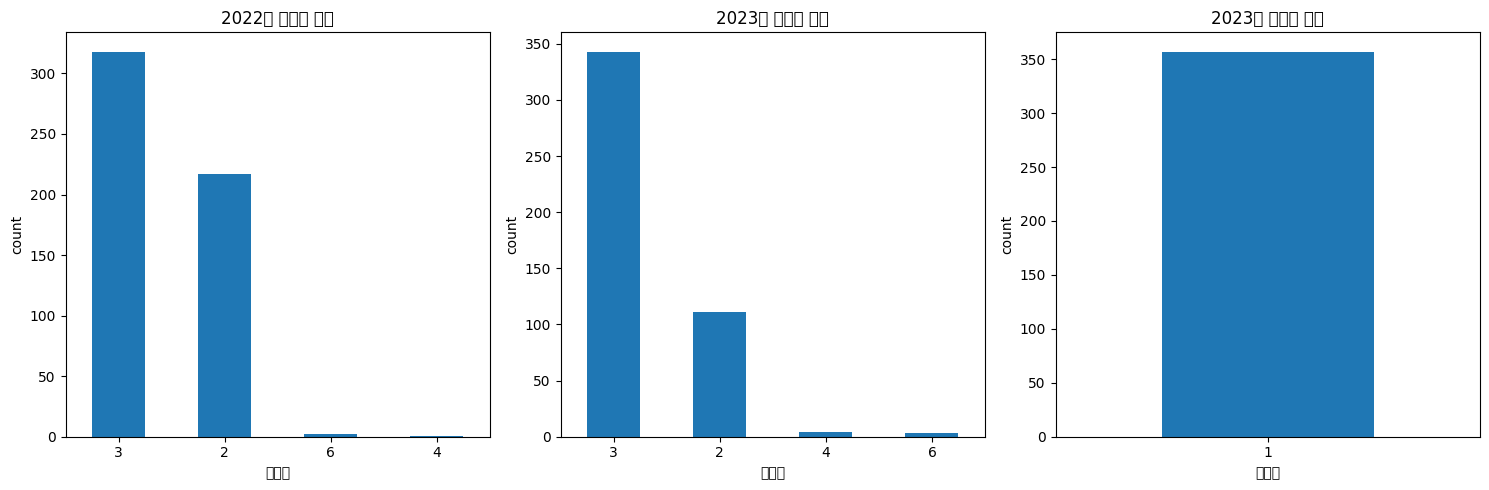

In [28]:
# 시각화 자료로 이탈자, 복귀자 확인

# 서브플롯 생성
plt.figure(figsize=(15, 5))

# 2021년 데이터
plt.subplot(1, 3, 1)
brand_change_22.plot(kind='bar')
plt.title('2022년 이탈자 분포')
plt.xlabel('제조사')
plt.ylabel('count')
plt.xticks(rotation=0)

# 2022년 데이터
plt.subplot(1, 3, 2)
brand_change_23.plot(kind='bar')
plt.title('2023년 이탈자 분포')
plt.xlabel('제조사')
plt.ylabel('count')
plt.xticks(rotation=0)

# 2023년 데이터
plt.subplot(1, 3, 3)
brand_return_23.plot(kind='bar')
plt.title('2023년 복귀자 분포')
plt.xlabel('제조사')
plt.ylabel('count')
plt.xticks(rotation=0)

plt.tight_layout()

plt.show()


In [29]:
total_customer = phone_df['pid'].count()
print(f'전체 인원 수 :{total_customer}')

total_samsung_21 = phone_df[phone_df['brand_21'] == 1]['brand_21'].count()
print(f'21년도 삼성 인원 수 :{total_samsung_21}')

total_samsung_22 = phone_df[phone_df['brand_22'] == 1]['brand_22'].count()
print(f'22년도 삼성 인원 수 :{total_samsung_22}')

total_samsung_23 = phone_df[phone_df['brand_23'] == 1]['brand_23'].count()
print(f'23년도 삼성 인원 수 :{total_samsung_23}')

total_chaged = len(changed_users23) + len(changed_users23)
print(f'전체 이탈자 수 :{total_chaged}')

total_merged = phone_df[phone_df['brand_23'] == 1]['brand_23'].count() + total_chaged
print(f'이탈자를 포함한 총 고객 수 :{total_merged}')



전체 인원 수 :8342
21년도 삼성 인원 수 :6846
22년도 삼성 인원 수 :6987
23년도 삼성 인원 수 :7133
전체 이탈자 수 :948
이탈자를 포함한 총 고객 수 :8081


In [30]:
phone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8342 entries, 0 to 8341
Data columns (total 73 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   pid                  8342 non-null   int64 
 1   email_21             8342 non-null   int64 
 2   messenger_21         8342 non-null   int64 
 3   blog_21              8342 non-null   int64 
 4   cloud_21             8342 non-null   int64 
 5   call_check_21        8342 non-null   int64 
 6   service_purchase_21  8128 non-null   object
 7   money_transfer_21    8128 non-null   object
 8   cradit_card_21       8128 non-null   object
 9   agency_purchase_21   8342 non-null   int64 
 10  machine_purchase_21  8342 non-null   int64 
 11  phone_owner_21       8342 non-null   int64 
 12  data_21              8342 non-null   int64 
 13  dmb_21               8342 non-null   int64 
 14  agency_21            8342 non-null   int64 
 15  voice_service_21     8342 non-null   int64 
 16  data_s

In [31]:
phone_df.describe()

,pid,email_21,messenger_21,blog_21,cloud_21,call_check_21,agency_purchase_21,machine_purchase_21,phone_owner_21,data_21,...,email_23,messenger_23,blog_23,cloud_23,age_23,school_23,marry_23,salary_23,job_23,religion_23
count,8.342000e+03,8342.000000,8342.000000,8342.000000,8342.000000,8342.000000,8342.000000,8342.000000,8342.000000,8342.000000,...,8342.000000,8342.000000,8342.000000,8342.000000,8342.000000,8342.000000,8342.000000,8342.000000,8342.000000,8342.000000
mean,4.972803e+07,1.290218,1.099137,1.928554,1.826900,1.669983,46.065452,7.809039,1.994725,2.969312,...,1.418005,1.052625,1.938744,1.850036,5.382882,3.235555,1.801007,5.127787,1.383721,1.711940
std,3.830533e+07,0.453890,0.298864,0.257583,0.378356,0.470247,18.905637,11.135673,1.413016,0.715337,...,0.493261,0.223298,0.239814,0.357058,1.824025,0.930516,0.637297,3.618708,0.486320,0.452887
min,1.000100e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,1.573000e+07,1.000000,1.000000,2.000000,2.000000,1.000000,33.000000,0.000000,1.000000,3.000000,...,1.000000,1.000000,2.000000,2.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000
50%,5.040000e+07,1.000000,1.000000,2.000000,2.000000,2.000000,45.000000,0.000000,1.000000,3.000000,...,1.000000,1.000000,2.000000,2.000000,6.000000,3.000000,2.000000,5.000000,1.000000,2.000000
75%,7.021750e+07,2.000000,1.000000,2.000000,2.000000,2.000000,56.000000,14.000000,4.000000,3.000000,...,2.000000,1.000000,2.000000,2.000000,7.000000,4.000000,2.000000,8.000000,2.000000,2.000000
max,1.183300e+08,2.000000,2.000000,2.000000,2.000000,2.000000,200.000000,110.000000,5.000000,4.000000,...,2.000000,2.000000,2.000000,2.000000,8.000000,5.000000,4.000000,18.000000,2.000000,2.000000


실 데이터 훈련 수

- total_merged  이탈자를 합한 총 데이터
- total_chaged  이탈자 데이터
    - 이탈자의 총 비율 total_changed / totla_merged

---
### 이후에는 데이터를 가지고 각자 머신러닝 훈련

-----------------------------

### RandomForestClassifier로 학습 및 이탈 예측

In [ ]:
# Random Forest 모델을 학습 진행
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE


# Random Forest 모델
rf_model = RandomForestClassifier(random_state=42)

# 타겟 변수(y)와 특징 변수(X) 정의
X = phone_df.drop(columns=['pid', 'churn', 'brand_21', 'brand_22', 'brand_23'])  # 필요없는 컬럼 제외
y = phone_df['churn']  # 타겟은 이탈 여부

# 빈 문자열을 NaN으로 변환
X.replace(" ", pd.NA, inplace=True)

# NaN 값을 0으로 채우기
X.fillna(0, inplace=True)

# 훈련 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 하이퍼파라미터 튜닝을 위한 GridSearch 설정
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# GridSearchCV로 최적화
grid_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=1)

# 모델 학습
grid_rf.fit(X_train, y_train)

# 최적 파라미터 출력
print("최적 Random Forest 파라미터:", grid_rf.best_params_)

# 최적 모델로 예측
rf_pred = grid_rf.best_estimator_.predict(X_test)

# 모델 평가
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 성능 평가
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_confusion = confusion_matrix(y_test, rf_pred)
rf_report = classification_report(y_test, rf_pred)

# 성능 출력
print("Random Forest 정확도:", rf_accuracy)
print("Random Forest 혼동 행렬:\n", rf_confusion)
print("Random Forest 분류 리포트:\n", rf_report)



Fitting 3 folds for each of 48 candidates, totalling 144 fits
최적 Random Forest 파라미터: {'bootstrap': False, 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest 정확도: 0.8711803475134812
Random Forest 혼동 행렬:
 [[ 105  181]
 [  34 1349]]
Random Forest 분류 리포트:
               precision    recall  f1-score   support

           0       0.76      0.37      0.49       286
           1       0.88      0.98      0.93      1383

    accuracy                           0.87      1669
   macro avg       0.82      0.67      0.71      1669
weighted avg       0.86      0.87      0.85      1669



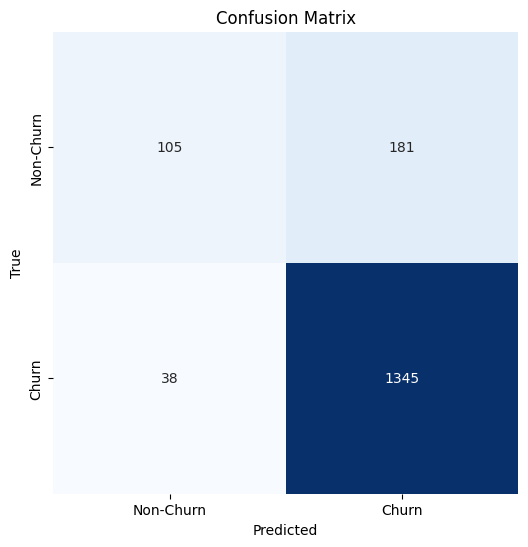

In [62]:


# 혼동 행렬 계산
cm = confusion_matrix(y_test, rf_pred)

# 혼동 행렬 시각화
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["Non-Churn", "Churn"], yticklabels=["Non-Churn", "Churn"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()



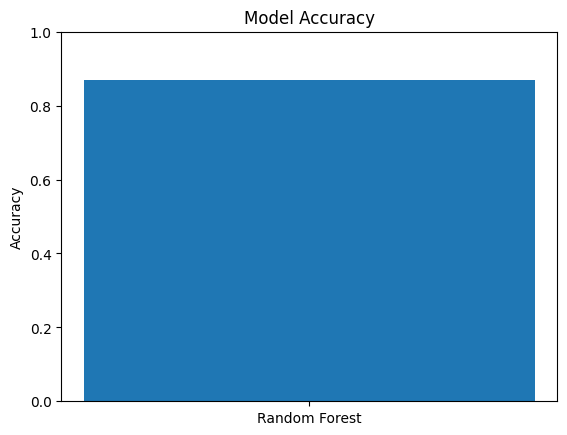

In [63]:
# 정확도 시각화
accuracy = accuracy_score(y_test, rf_pred)
plt.bar(["Random Forest"], [accuracy])
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.show()


In [41]:
# y_train 의 고유값 확인
y_train.value_counts()

churn
0    6673
Name: count, dtype: int64

# 데이터 불균형을 해결하기 위해 오버 샘플링 확용

In [45]:
# 빈 문자열을 NaN으로 변환
X.replace(" ", pd.NA, inplace=True)

# NaN 값을 0으로 채우기
X.fillna(0, inplace=True)

# 다시 훈련 데이터와 테스트 데이터로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE 적용 - 오버샘플링
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Random Forest 모델
rf_model = RandomForestClassifier(random_state=42)

# 하이퍼파라미터 튜닝을 위한 GridSearch 설정
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# GridSearchCV로 최적화 (교차 검증)
grid_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=1)

# 모델 학습
grid_rf.fit(X_train_res, y_train_res)

# 최적 파라미터 출력
print("최적 Random Forest 파라미터:", grid_rf.best_params_)

# 최적 모델로 예측
rf_pred = grid_rf.best_estimator_.predict(X_test)

# 모델 평가
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_confusion = confusion_matrix(y_test, rf_pred)
rf_report = classification_report(y_test, rf_pred)

# 성능 출력
print("Random Forest 정확도:", rf_accuracy)
print("Random Forest 혼동 행렬:\n", rf_confusion)
print("Random Forest 분류 리포트:\n", rf_report)



Fitting 3 folds for each of 48 candidates, totalling 144 fits
최적 Random Forest 파라미터: {'bootstrap': False, 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest 정확도: 0.8681845416417017
Random Forest 혼동 행렬:
 [[ 111  175]
 [  45 1338]]
Random Forest 분류 리포트:
               precision    recall  f1-score   support

           0       0.71      0.39      0.50       286
           1       0.88      0.97      0.92      1383

    accuracy                           0.87      1669
   macro avg       0.80      0.68      0.71      1669
weighted avg       0.85      0.87      0.85      1669



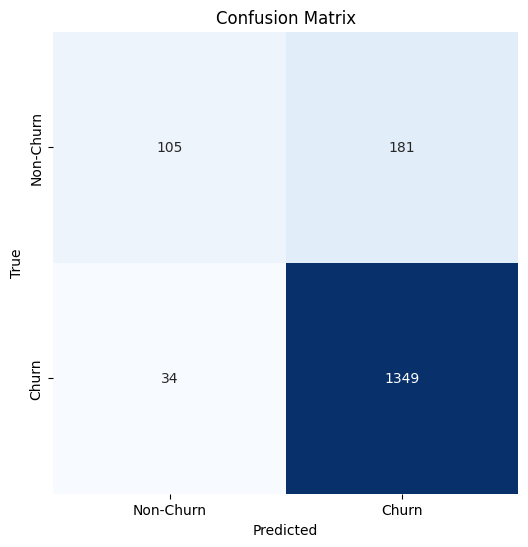

In [50]:
# 1. 혼동 행렬 시각화
cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["Non-Churn", "Churn"], yticklabels=["Non-Churn", "Churn"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# HEATMAP 설명:
- 시도해본 Random Forest모델은 1349명의 **이탈자(Churn)**를 정확하게 예측했고, 105명의 **비이탈자(Non-Churn)**도 정확히 예측했습니다.
- 그러나 모델은 181명의 비이탈자를 잘못 이탈자로 예측했으며, 34명의 이탈자를 잘못 비이탈자로 예측했습니다.
- 이러한 결과는 모델의 예측 성능을 평가할 수 있게 해주며, 정확도 외에도 정밀도, 재현율, F1-스코어를 계산하여 성능을 더 잘 이해할 수 있습니다.

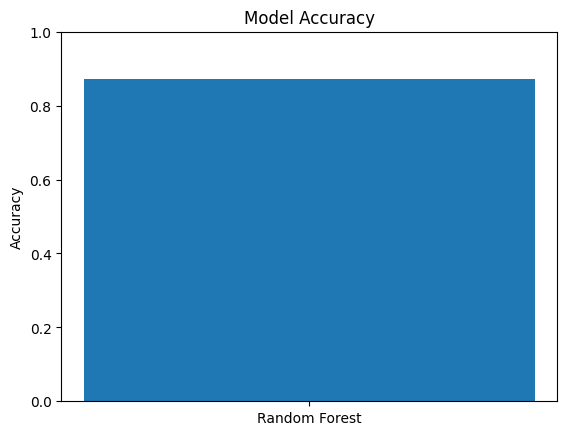

In [51]:
# 2. 정확도 시각화
accuracy = accuracy_score(y_test, rf_pred)
plt.bar(["Random Forest"], [accuracy])
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.show()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_17236\609606219.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['Non-Churn', 'Churn'])
C:\Users\Playdata\AppData\Local\Temp\ipykernel_17236\609606219.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['Non-Churn', 'Churn'])


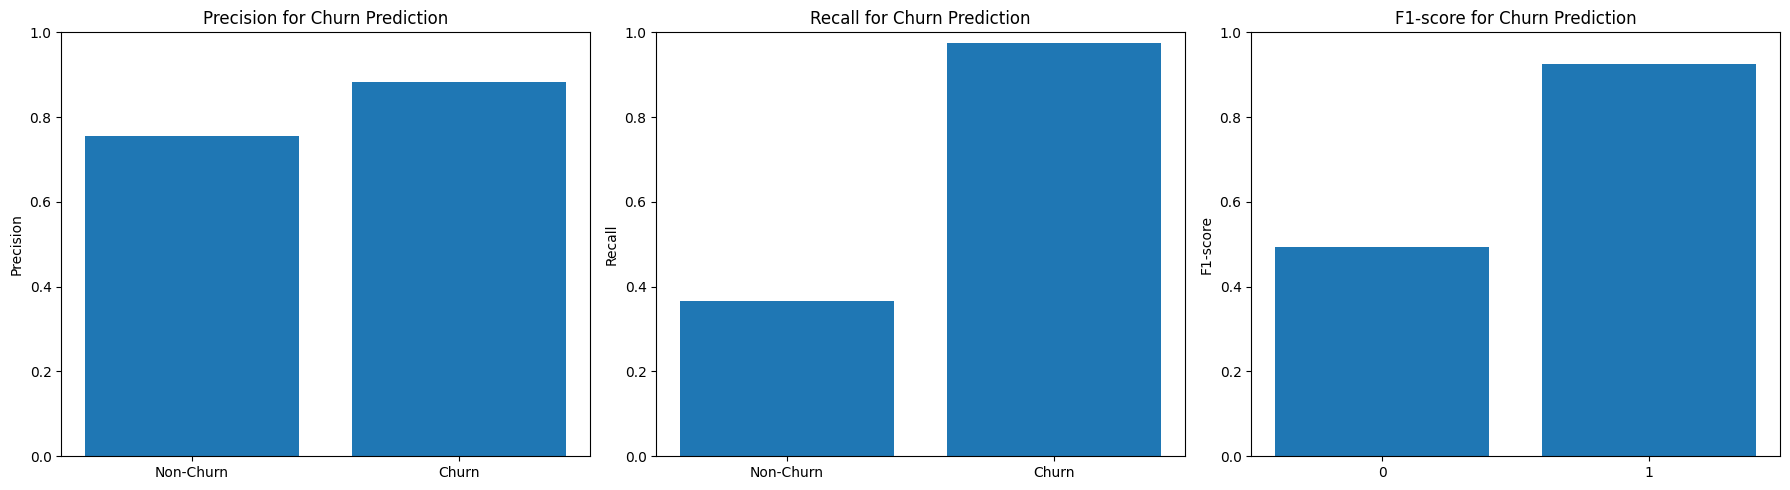

In [56]:
# 3. 정밀도, 재현율, F1-스코어 시각화
report = classification_report(y_test, rf_pred, output_dict=True)
metrics = ['precision', 'recall', 'f1-score']
classes = ['0', '1']  # 수정: 0과 1을 클래스명으로 사용

# 그림 크기 설정 및 서브 플롯 생성
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# 각 metric에 대해 그래프를 생성
for i, metric in enumerate(metrics):
    ax[i].bar(classes, [report[class_][metric] for class_ in classes])
    ax[i].set_ylim(0, 1)
    ax[i].set_title(f'{metric.capitalize()} for Churn Prediction')
    ax[i].set_ylabel(metric.capitalize())

# 레이블을 'Non-Churn'과 'Churn'으로 변경
ax[0].set_xticklabels(['Non-Churn', 'Churn'])
ax[1].set_xticklabels(['Non-Churn', 'Churn'])

plt.tight_layout()  # 레이아웃 조정
plt.show()



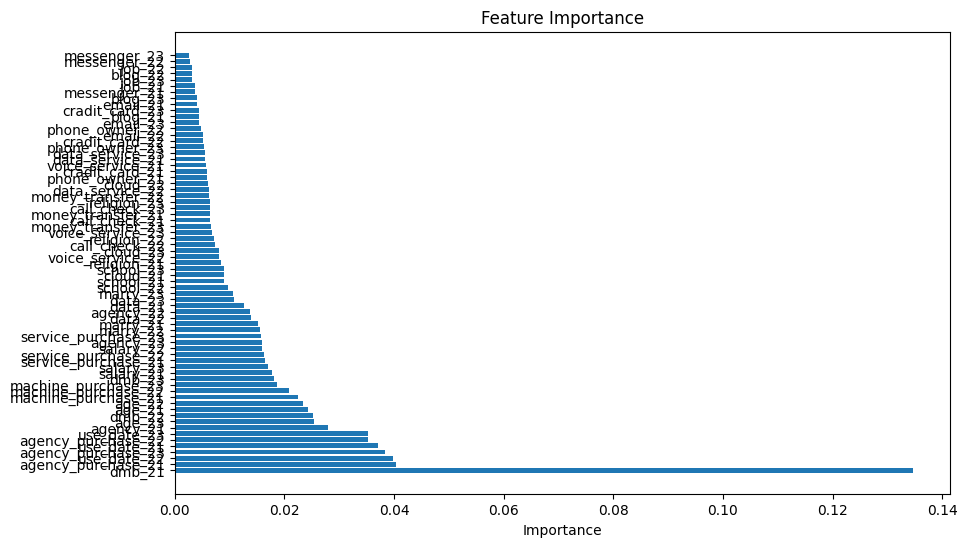

In [53]:
# 4. 특징 중요도 시각화 (Random Forest의 경우)
importances = grid_rf.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Importance")
plt.show()


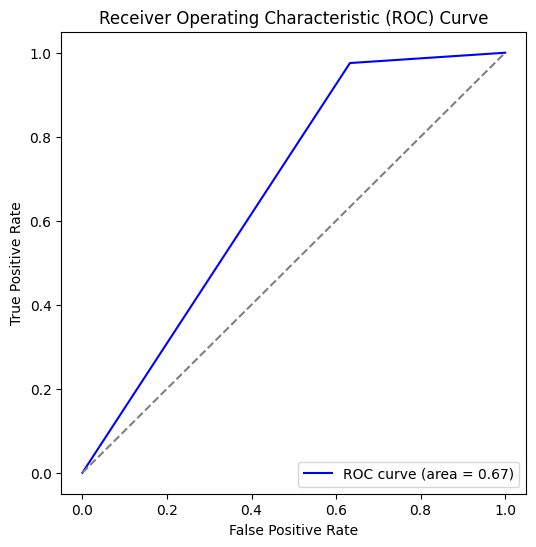

In [59]:
# 5. ROC Curve 시각화
# ROC Curve 계산
fpr, tpr, _ = roc_curve(y_test, rf_pred)
roc_auc = auc(fpr, tpr)

# ROC Curve 시각화
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
plt.show()

# 설명 :
- AUC (Area Under the Curve) 값이 0.5보다 낮으면 모델이 무작위 예측을 하고 있다는 뜻이며, 0.5 이상이면 모델이 예측을 하고 있다는 것을 의미
- AUC가 0.67이면 모델이 무작위 예측보다는 성능이 낫다는 것을 의미합니다.

----

### GridSearchCV 활용 하이퍼파라미터 적용 성능 개선 시도

# 시간이 너무 오래 걸림(필요시 삭제 가능 8분 31초 대략략)

In [ ]:
# 하이퍼파라미터 후보 설정
param_grid = {
    'n_estimators': [100, 200, 300],  # 트리 개수
    'max_depth': [None, 10, 20, 30],  # 트리 깊이
    'min_samples_split': [2, 5, 10],  # 최소 샘플 분할 수
    'min_samples_leaf': [1, 2, 4],    # 리프 노드 최소 샘플 수
    'max_features': ['sqrt', 'log2'],  # max_features 값을 'auto' 대신 'sqrt' 또는 'log2'로 변경
    'bootstrap': [True, False]  # 부트스트랩 샘플링 여부
}

# 빈 문자열을 NaN으로 변환
X.replace(" ", pd.NA, inplace=True)

# NaN 값을 0으로 채우기
X.fillna(0, inplace=True)

# 다시 훈련 데이터와 테스트 데이터로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE 적용 - 오버샘플링
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


# Random Forest 모델
rf_model = RandomForestClassifier(random_state=42)

# GridSearchCV로 하이퍼파라미터 튜닝 (교차 검증)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# 모델 학습
grid_search.fit(X_train_res, y_train_res)

# 최적의 하이퍼파라미터 출력
print("최적 하이퍼파라미터:", grid_search.best_params_)

# 최적 모델로 예측
rf_pred = grid_search.best_estimator_.predict(X_test)

# 모델 평가
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_confusion = confusion_matrix(y_test, rf_pred)
rf_report = classification_report(y_test, rf_pred)

# 성능 출력
print("Random Forest 정확도:", rf_accuracy)
print("Random Forest 혼동 행렬:\n", rf_confusion)
print("Random Forest 분류 리포트:\n", rf_report)



Fitting 3 folds for each of 432 candidates, totalling 1296 fits


In [ ]:
# 1. 정확도 시각화
accuracy = accuracy_score(y_test, rf_pred)
plt.bar(["Random Forest"], [accuracy])
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.show()

In [ ]:
# 2. 정밀도, 재현율, F1-스코어 시각화
report = classification_report(y_test, rf_pred, output_dict=True)
metrics = ['precision', 'recall', 'f1-score']
classes = ['0', '1']  # 수정: 0과 1을 클래스명으로 사용

# 그림 크기 설정 및 서브 플롯 생성
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# 각 metric에 대해 그래프를 생성
for i, metric in enumerate(metrics):
    ax[i].bar(classes, [report[class_][metric] for class_ in classes])
    ax[i].set_ylim(0, 1)
    ax[i].set_title(f'{metric.capitalize()} for Churn Prediction')
    ax[i].set_ylabel(metric.capitalize())

# 레이블을 'Non-Churn'과 'Churn'으로 변경
ax[0].set_xticklabels(['Non-Churn', 'Churn'])
ax[1].set_xticklabels(['Non-Churn', 'Churn'])

plt.tight_layout()  # 레이아웃 조정
plt.show()

In [ ]:
# 3. ROC Curve 시각화
# ROC Curve 계산
fpr, tpr, _ = roc_curve(y_test, rf_pred)
roc_auc = auc(fpr, tpr)

# ROC Curve 시각화
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
plt.show()